In [1]:
# kaggle competition 'back of words meets bags of popcorn data'
# URL : https://www.kaggle.com/c/word2vec-nlp-tutorial/data

# 파일 압축 해제
import zipfile

DATA_IN_PATH = '/Users/childult-programmer/word2vec-nlp-tutorial/'
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip',
            'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
# jupyter notebook에서 그리도록 함
%matplotlib inline

In [3]:
# 데이터 구조를 확인
train_data = pd.read_csv(DATA_IN_PATH+"labeledTrainData.tsv", header=0, delimiter='\t', quoting=3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


## 데이터 분석 (EDA)

In [4]:
# 1. 데이터 크기
print("파일 크기: ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기: 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


In [5]:
# 2. 데이터의 개수
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

전체 학습 데이터의 개수: 25000


In [6]:
# 3. 각 데이터(review)의 문자 길이
train_length = train_data['review'].apply(len)
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

Text(0, 0.5, 'Number of review')

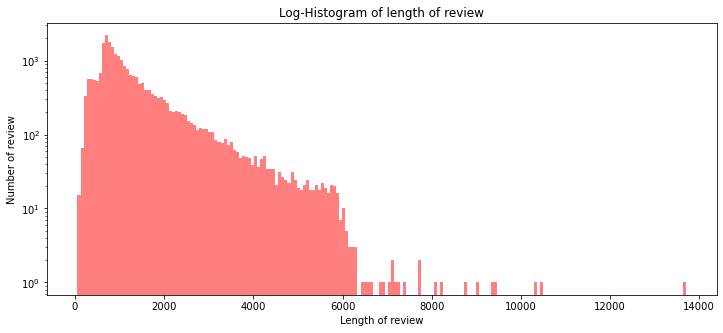

In [7]:
# 3-1. review 길이 히스토그램
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [8]:
# 3-2. review 길이에 대한 통계값
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71056
리뷰 길이 표준편차: 1005.2191407969154
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffea2f0dfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffea304d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffea2f0dc40>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffea304dd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffea3057400>],
 'means': [<matplotlib.lines.Line2D at 0x7ffea30570a0>]}

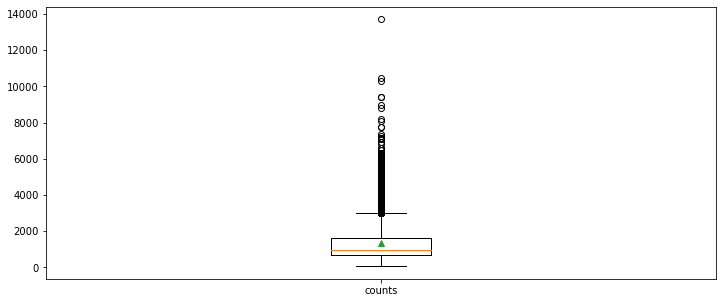

In [9]:
# 3-3. review 길이 boxplot
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

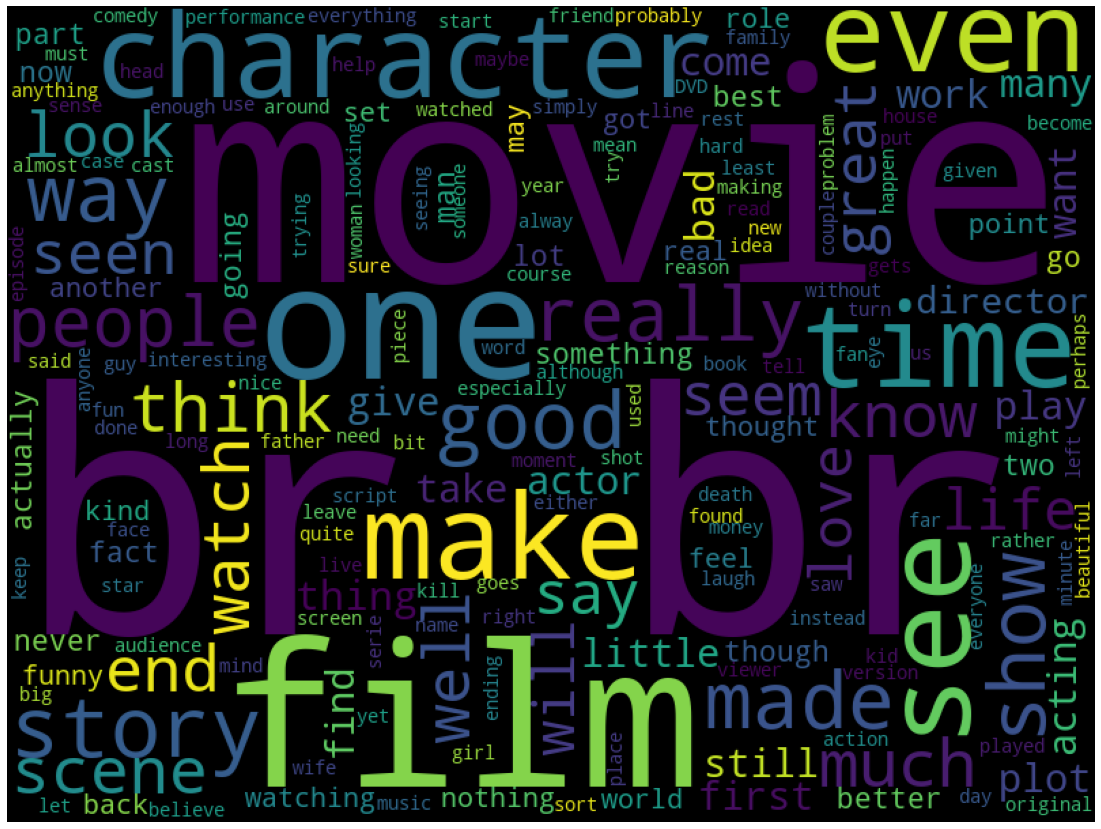

In [10]:
# 4. 많이 사용된 단어
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

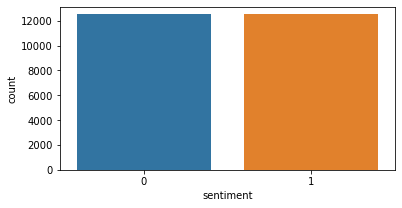

In [11]:
# 5. 긍정/부정 데이터의 분포
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])

In [12]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


In [13]:
# 6-1. 각 리뷰당 단어 개수
train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))
train_word_counts.head()

0    433
1    158
2    378
3    379
4    367
Name: review, dtype: int64

Text(0, 0.5, 'Number of reviews')

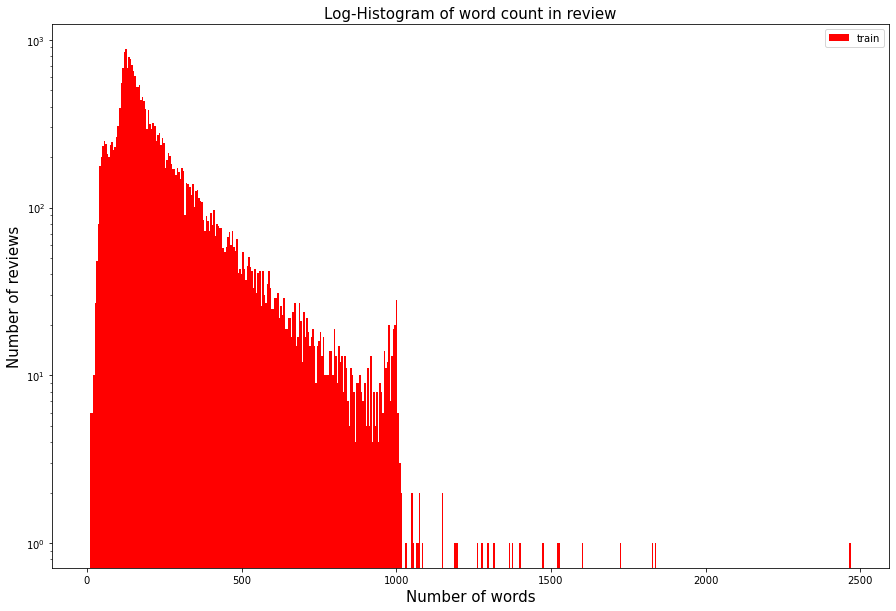

In [14]:
# 6-2. 각 리뷰당 단어 개수 히스토그램
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=500, facecolor='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [15]:
# 6-3. review 단어 개수에 대한 통계값
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 2470
리뷰 단어 개수 최솟값: 10
리뷰 단어 개수 평균값: 233.78624
리뷰 단어 개수 표준편차: 173.74237015380743
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제1사분위: 127.0
리뷰 단어 개수 제3사분위: 284.0


In [16]:
# 7. 각 review별 특수문자, 대소문자 비율
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # '?'가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x : max([y.isupper() for y in x]))) # 대문자 개수
numbers = np.mean(train_data['review'].apply(lambda x : max([y.isdigit() for y in x]))) # 숫자 개수

print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 문자가 대문자인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가 있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가 있는 질문: {:.2f}%'.format(numbers * 100))

물음표가 있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 문자가 대문자인 질문: 0.00%
대문자가 있는 질문: 99.59%
숫자가 있는 질문: 56.66%


## 데이터 전처리

In [17]:
import re
import json
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [18]:
# HTML 태그와 특수문자를 제거
review = train_data['review'][0]
review_text = BeautifulSoup(review, "html5lib").get_text() # HTML 태그(ex. br) 제거
review_text = re.sub("[^a-zA-z]", " ", review_text) # 영어를 제외한 나머지는 모두 공백으로 바꾼다, 특수문자 제거
review_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

In [19]:
# 불용어(영어에서는 조사, 관사 등) 제거
stop_words = set(stopwords.words('english')) # 영어 불용어 set을 만든다

review_text = review_text.lower() # 모든 문자를 소문자로 치환
words = review_text.split() # 단어마다 나누어 단어 리스트를 생성
words = [w for w in words if not w in stop_words] # 위에서 만든 단어 리스트에서 불용어를 제외한 리스트를 생성

clean_review = ' '.join(words) # 단어 리스트를 다시 하나의 글로 합침
clean_review

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [20]:
# 위의 전처리 작업을 모든 리뷰에 적용하기 위해, 함수로 만들어 관리
def preprocessing(review, remove_stopwords=True):
    # 불용어 제거에 대해서는 옵션으로 선택할 수 있게끔 한다.
    
    # 1. HTML 태그 제거
    review_text = BeautifulSoup(review, "html5lib").get_text()
    
    # 2. 영어를 제외한 특수문자를 공백으로 치환
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. 대문자를 소문자로 바꾸고, 공백 단위로 텍스트를 나눈 리스트를 생성
    words = review_text.lower().split()
    
    # 4. 불용어 제거
    if remove_stopwords:
        # 영어 불용어 불러오기
        stops = set(stopwords.words("english"))
        # 불용어가 아닌 단어로 이루어진 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        # 5. 단어 리스트를 공백을 넣어 하나의 글로 다시 합침
        clean_review = ' '.join(words)
    
    # 불용어를 제거하지 않을 때    
    else:
        clean_review = ' '.join(words)
        
    return clean_review

In [21]:
# 전체 데이터(리뷰)에 대해 전처리
clean_train_reviews = []
for review in train_data['review']:
    clean_train_reviews.append(preprocessing(review))

# 첫 번째 리뷰로 전처리 확인
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [22]:
# 전처리한 데이터(clean_train_reviews)를 pandas DataFrame으로 만듦
clean_train_df = pd.DataFrame({'review' : clean_train_reviews, 'sentiment' : train_data['sentiment']})

In [23]:
# 입력 값을 텍스트가 아닌 각 단어의 인덱스로 벡터화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

# 텍스트가 아닌 각 단어의 인덱스로 바뀌어 있음
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [24]:
# 각 인덱스가 어떤 단어를 의미하는지 확인하기 위해, 단어 사전을 생성
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

# 위에서 구한 단어 사전과 전체 단어 개수를 딕셔너리 값을 지정해 저장
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab) + 1

print("전체 단어 개수: ", len(word_vocab))
print(word_vocab)

전체 단어 개수:  74066
{'movie': 1, 'film': 2, 'one': 3, 'like': 4, 'good': 5, 'time': 6, 'even': 7, 'would': 8, 'story': 9, 'really': 10, 'see': 11, 'well': 12, 'much': 13, 'get': 14, 'bad': 15, 'people': 16, 'also': 17, 'first': 18, 'great': 19, 'made': 20, 'way': 21, 'make': 22, 'could': 23, 'movies': 24, 'think': 25, 'characters': 26, 'character': 27, 'watch': 28, 'two': 29, 'films': 30, 'seen': 31, 'many': 32, 'life': 33, 'plot': 34, 'acting': 35, 'never': 36, 'love': 37, 'little': 38, 'best': 39, 'show': 40, 'know': 41, 'ever': 42, 'man': 43, 'better': 44, 'end': 45, 'still': 46, 'say': 47, 'scene': 48, 'scenes': 49, 'go': 50, 'something': 51, 'back': 52, 'real': 53, 'watching': 54, 'though': 55, 'thing': 56, 'old': 57, 'years': 58, 'actors': 59, 'director': 60, 'work': 61, 'another': 62, 'new': 63, 'nothing': 64, 'funny': 65, 'actually': 66, 'makes': 67, 'look': 68, 'find': 69, 'going': 70, 'part': 71, 'lot': 72, 'every': 73, 'world': 74, 'cast': 75, 'us': 76, 'quite': 77, 'want': 78,

In [25]:
# 모델에 적용하기 위해 데이터들의 길이를 통일
# 특정 최대 길이를 정하고, 더 긴 데이터는 뒷부분을 자르고 짧은 데이터는 0값으로 패딩
MAX_SEQUENCE_LENGTH = 174 # 최대 길이, 단어 개수의 중간값(median)

# pad_sequences(데이터, 최대 길이, 패딩할 값(0)을 데이터 앞에 넣을지(pre), 뒤에 넣을지(post))
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of train data: ', train_inputs.shape)

Shape of train data:  (25000, 174)


In [26]:
# 라벨을 numpy 배열로 저장
train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor:', train_labels.shape)

Shape of label tensor: (25000,)


In [27]:
# 벡터화한 전처리된 데이터와 라벨은 numpy 파일로 저장
# 텍스트 데이터는 CSV 파일로 저장
# 데이터 사전은 JSON 파일로 저장
SAVE_DATA_IN_PATH = '/Users/childult-programmer/movie_review_sentiment_analysis/data/'
TRAIN_INPUT_DATA = 'train_input.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
TRAIN_CLEAN_DATA = 'train_clean.csv'
DATA_CONFIGS = 'data_configs.json'

# 저장하는 디렉터리가 존재하지 않으면 생성
if not os.path.exists(SAVE_DATA_IN_PATH):
    os.makedirs(SAVE_DATA_IN_PATH)

In [28]:
# 전처리된 데이터를 numpy 형태로 저장
np.save(open(SAVE_DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(SAVE_DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)

# 정제된 텍스트를 CSV 형태로 저장
clean_train_df.to_csv(SAVE_DATA_IN_PATH + TRAIN_CLEAN_DATA, index=False)

# 데이터 사전을 JSON 형태로 저장
json.dump(data_configs, open(SAVE_DATA_IN_PATH + DATA_CONFIGS, 'w'), ensure_ascii=False)

In [29]:
# 평가 데이터(test data)에 대해서도 위와 동일한 방법으로 전처리하고 각 리뷰에 대한 'id'값을 저장
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)

clean_test_reviews = []
for review in test_data['review']:
    clean_test_reviews.append(preprocessing(review))

clean_test_df = pd.DataFrame({'review' : clean_test_reviews, 'id' : test_data['id']})
test_id = np.array(test_data['id'])

tokenizer.fit_on_texts(clean_test_reviews)
text_sequences = tokenizer.texts_to_sequences(clean_test_reviews)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

test_data

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."
...,...,...
24995,"""2155_10""","""Sony Pictures Classics, I'm looking at you! S..."
24996,"""59_10""","""I always felt that Ms. Merkerson had never go..."
24997,"""2531_1""","""I was so disappointed in this movie. I am ver..."
24998,"""7772_8""","""From the opening sequence, filled with black ..."


In [30]:
# 평가 데이터를 전처리한 데이터를 저장
# 평가 데이터의 경우, 라벨 값이 없기 때문에 라벨은 따로 저장하지 않음
TEST_INPUT_DATA = 'test_inputs.npy'
TEST_CLEAN_DATA = 'test_clean.csv'
TEST_ID_DATA = 'test_id.npy'

np.save(open(SAVE_DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(SAVE_DATA_IN_PATH + TEST_ID_DATA, 'wb'), test_id)
clean_test_df.to_csv(SAVE_DATA_IN_PATH + TEST_CLEAN_DATA, index=False)

## 모델 구현

### TF-IDF를 활용한 모델 구현

In [31]:
# 입력값은 텍스트로 이루어진 데이터
reviews = list(train_data['review'])
sentiments = list(train_data['sentiment'])

In [32]:
# TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.0, analyzer='char', sublinear_tf = True,
                           ngram_range=(1,3), max_features=5000)

X = vectorizer.fit_transform(reviews)

In [33]:
# 학습 데이터와 검증 데이터 분리
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
TEST_SPLIT = 0.2

y = np.array(sentiments)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=TEST_SPLIT, random_state = RANDOM_SEED)

In [34]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression

lgs = LogisticRegression(class_weight='balanced')
lgs.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [35]:
# 위에서 분리한 검증 데이터를 활용하여 모델의 성능을 평가
print('Accuracy: {:f}'.format(lgs.score(X_eval, y_eval)))

Accuracy: 0.869600


In [36]:
# 생성한 모델을 활용해 평가 데이터의 결과를 예측하고, kaggle에 실제로 제출
# 전처리한 텍스트 형태의 평가 데이터를(위에서 test_data로 생성), TF_IDF 값으로 벡터화
testDataVecs = vectorizer.transform(test_data['review'])

In [37]:
test_predicted = lgs.predict(testDataVecs)
print(test_predicted)

[1 0 0 ... 0 1 1]


In [38]:
# 위의 예측값(test_predicted)을 데이터프레임 형태로 만들어 CSV 파일로 저장
DATA_OUT_PATH = SAVE_DATA_IN_PATH

ids = list(test_data['id'])
answer_dataset = pd.DataFrame({'id': ids, 'sentiment': test_predicted})
answer_dataset.to_csv(DATA_OUT_PATH + 'lgs_tfidf_submission.csv', index=False, quoting=3)